In [11]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [12]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

In [13]:
driver.get("https://results.eci.gov.in/PcResultGenJune2024/index.htm")

In [15]:
dropdown = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_Result1_ddlState"]'))
)
dropdown.click()

In [16]:
state_option = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, "/html/body/main/div/section/div/div[2]/div[1]/div/div[1]/div/select"))
)
state_option.send_keys('Andaman & Nicobar Islands')
state_option.click()

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=126.0.6478.127); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00E8C1C3+27395]
	(No symbol) [0x00E23DC4]
	(No symbol) [0x00D21B7F]
	(No symbol) [0x00D2FE47]
	(No symbol) [0x00D3063E]
	(No symbol) [0x00D2774B]
	(No symbol) [0x00D25A84]
	(No symbol) [0x00D288F8]
	(No symbol) [0x00D28970]
	(No symbol) [0x00D64652]
	(No symbol) [0x00D59082]
	(No symbol) [0x00D8399C]
	(No symbol) [0x00D58C15]
	(No symbol) [0x00D83C34]
	(No symbol) [0x00D9CB24]
	(No symbol) [0x00D83736]
	(No symbol) [0x00D57541]
	(No symbol) [0x00D580BD]
	GetHandleVerifier [0x01143A93+2876371]
	GetHandleVerifier [0x01197F5D+3221661]
	GetHandleVerifier [0x00F0D634+556916]
	GetHandleVerifier [0x00F1474C+585868]
	(No symbol) [0x00E2CE04]
	(No symbol) [0x00E29818]
	(No symbol) [0x00E299B7]
	(No symbol) [0x00E1BF0E]
	BaseThreadInitThunk [0x77197BA9+25]
	RtlInitializeExceptionChain [0x77C0C10B+107]
	RtlClearBits [0x77C0C08F+191]


In [17]:
dropdown = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_Result1_ddlState"]'))
)
dropdown.click()

# Wait for the link to the results to be clickable and click on it
c = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="ctl00_ContentPlaceHolder1_Result1_ddlState"]/option[2]'))
) 
c.click()  

# Wait for the link to the results to be clickable and click on it
results_links = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, '/html/body/main/div/div[2]/div[2]/ul/li[2]/a/img'))
)
results_links.click()

# Wait for the table containing the results to be visible
results_table = WebDriverWait(driver, 10).until(
    EC.visibility_of_element_located((By.CLASS_NAME, "table-responsive"))
)

# Extract data from the table
rows = results_table.find_elements(By.TAG_NAME, "tr")
party_results = []

for row in rows[1:]:  # Skip the header row
    cols = row.find_elements(By.TAG_NAME, "td")
    if cols:
        sn = cols[0].text.strip()
        c = cols[1].text.strip()
        p = cols[2].text.strip()
        evm = cols[3].text.strip()
        pv = cols[4].text.strip()
        tv = cols[5].text.strip()
        ov = cols[6].text.strip()
        party_results.append({'S.No': sn, 'Candidate': c, 'Party': p, 'EVM Votes': evm, 'Postal Votes': pv, 'Total Votes': tv, 'Percentage of votes': ov})
        
# Convert the results to a DataFrame
df = pd.DataFrame(party_results)
df.to_csv('1 - Andaman & nicobar islands 1.csv', index=False)

In [18]:
# Close the WebDriver
driver.quit()

Data from 1 - Andaman & nicobar islands 1.csv:
   S.No           Candidate                                Party  EVM Votes  \
0     1     BISHNU PADA RAY               Bharatiya Janata Party     102182   
1     2  KULDEEP RAI SHARMA             Indian National Congress      77829   
2     3          MANOJ PAUL  Andaman Nicobar Democratic Congress       8236   
3     4          D AYYAPPAN   Communist Party of India (Marxist)       6009   
4     5     V.K. ABDUL AZIZ                          Independent       2195   

  Postal Votes  Total Votes  Percentage of votes  
0          254       102436                50.58  
1          211        78040                38.54  
2           18         8254                 4.08  
3            8         6017                 2.97  
4            8         2203                 1.09  
           EVM Votes  Postal Votes    Total Votes  Percentage of votes
count      13.000000     13.000000      13.000000            13.000000
mean    15537.846154     40.15

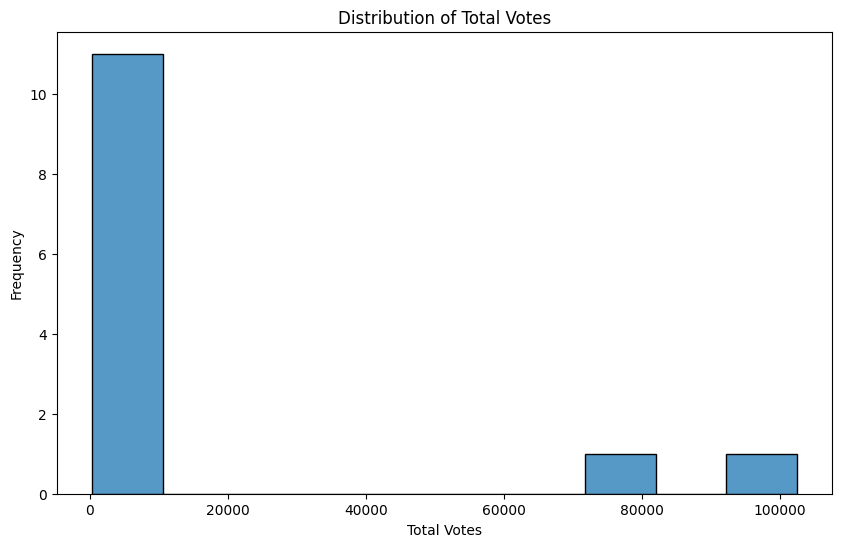

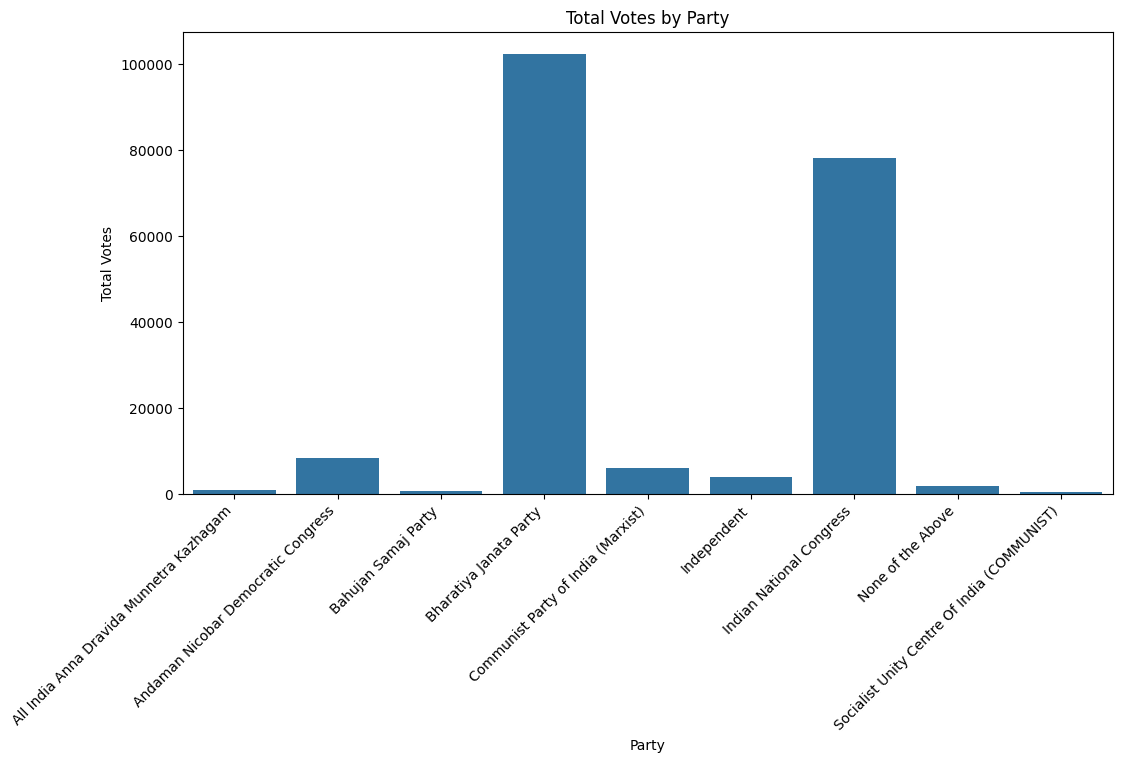

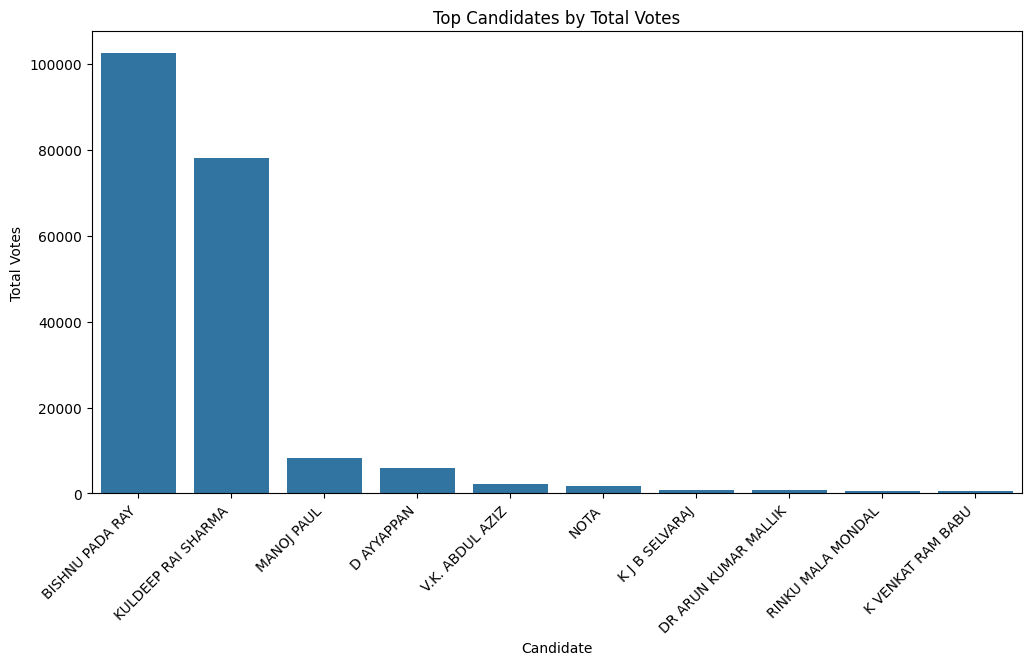

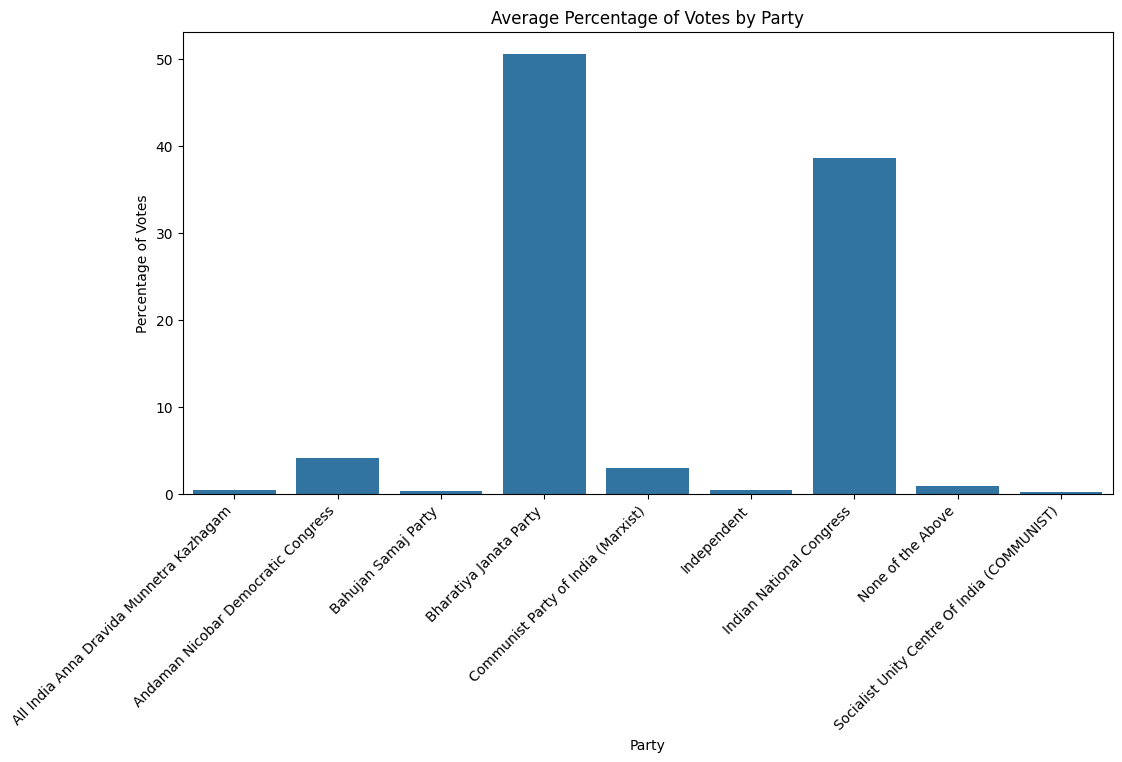

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# List of CSV files
csv_files = [
    '1 - Andaman & nicobar islands 1.csv',
]

all_data = []

for file in csv_files:
    try:
        # Check if file exists
        if not os.path.isfile(file):
            raise FileNotFoundError(f"File {file} not found.")
        
        # Load the CSV file
        df = pd.read_csv(file)
        
        # Print first few rows for debugging
        print(f"Data from {file}:")
        print(df.head())
        
        # Convert all columns to strings to ensure .str accessor works
        df = df.astype(str)
        
        # Clean data
        df.dropna(inplace=True)
        
        # Replace non-numeric values with 0
        df['EVM Votes'] = df['EVM Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Postal Votes'] = df['Postal Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Total Votes'] = df['Total Votes'].str.replace(',', '').replace('-', '0').astype(int)
        df['Percentage of votes'] = df['Percentage of votes'].str.replace('%', '').replace('-', '0').astype(float)
        
        # Append data to the list
        all_data.append(df)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Concatenate all DataFrames into one
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    # Save the combined data to a new CSV file
    combined_df.to_csv('Andaman_Election_Results.csv', index=False)

    # Perform Data Analysis and Visualization
    # Basic statistics
    print(combined_df.describe())

    # Distribution of total votes
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df['Total Votes'], bins=10)
    plt.title('Distribution of Total Votes')
    plt.xlabel('Total Votes')
    plt.ylabel('Frequency')
    plt.show()

    # Party-wise total votes
    party_votes = combined_df.groupby('Party')['Total Votes'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Party', y='Total Votes', data=party_votes)
    plt.title('Total Votes by Party')
    plt.xlabel('Party')
    plt.ylabel('Total Votes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Top candidates by total votes
    top_candidates = combined_df.sort_values(by='Total Votes', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Candidate', y='Total Votes', data=top_candidates)
    plt.title('Top Candidates by Total Votes')
    plt.xlabel('Candidate')
    plt.ylabel('Total Votes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Party-wise percentage of votes
    party_percentage = combined_df.groupby('Party')['Percentage of votes'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Party', y='Percentage of votes', data=party_percentage)
    plt.title('Average Percentage of Votes by Party')
    plt.xlabel('Party')
    plt.ylabel('Percentage of Votes')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No data to process.")
